In [6]:
!wget --header="Host: pjreddie.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://pjreddie.com/darknet/yolo/" --header="Cookie: __utma=134107727.1466851001.1657518085.1657518085.1657518085.1; __utmc=134107727; __utmz=134107727.1657518085.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); __utmt=1; __utmb=134107727.4.10.1657518085" --header="Connection: keep-alive" "https://pjreddie.com/media/files/yolov3-spp.weights" -c -O 'yolov3-spp.weights'

--2022-07-11 06:13:24--  https://pjreddie.com/media/files/yolov3-spp.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252209544 (241M) [application/octet-stream]
Saving to: ‘yolov3-spp.weights’

yolov3-spp.weights  100%[===================>] 240.53M   105MB/s    in 2.3s    

2022-07-11 06:13:26 (105 MB/s) - ‘yolov3-spp.weights’ saved [252209544/252209544]



In [7]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import cv2
import numpy as np

In [9]:
net = cv2.dnn.readNet('yolov3-spp.weights', 'yolov3.cfg' )

In [10]:
classes = []
with open('coco.names.txt', 'r') as f:
  classes = f.read().splitlines()

In [11]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [15]:
img = cv2.imread('image.jpg')
height, width,channels = img.shape

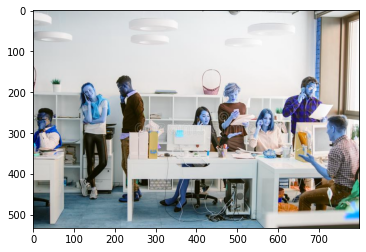

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [17]:
print('height', height)
print('width', width)
print('channels', channels)

height 533
width 800
channels 3


In [18]:
blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB = True, crop = False )

In [23]:
blob

array([[[[0.7294118 , 0.7254902 , 0.72156864, ..., 0.74509805,
          0.6901961 , 0.6392157 ],
         [0.7176471 , 0.7254902 , 0.7294118 , ..., 0.61960787,
          0.5176471 , 0.38431376],
         [0.7176471 , 0.7176471 , 0.72156864, ..., 0.3921569 ,
          0.36078432, 0.36862746],
         ...,
         [0.49803925, 0.4901961 , 0.4784314 , ..., 0.16470589,
          0.16078432, 0.15686275],
         [0.5137255 , 0.5019608 , 0.48627454, ..., 0.15686275,
          0.15686275, 0.14901961],
         [0.52156866, 0.50980395, 0.4901961 , ..., 0.14901961,
          0.14901961, 0.14509805]],

        [[0.7137255 , 0.7058824 , 0.7058824 , ..., 0.7843138 ,
          0.7411765 , 0.69411767],
         [0.7058824 , 0.70980394, 0.7176471 , ..., 0.67058825,
          0.5764706 , 0.44705886],
         [0.7058824 , 0.7058824 , 0.70980394, ..., 0.45882356,
          0.43137258, 0.45098042],
         ...,
         [0.44705886, 0.43921572, 0.42352945, ..., 0.227451  ,
          0.22352943, 0.2

In [24]:
net.setInput(blob)

In [25]:
output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)

In [26]:
boxes = []

confidences = []

class_id = []

for output in layerOutputs:
  for detection in output:
    scores = detection[5:]
    class_ids = np.argmax(scores)
    confidence = scores[class_ids]
    if confidence > 0.5:
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x, y, w, h])
      confidences.append((float(confidence)))
      class_id.append(class_ids)


In [27]:
print(len(boxes))

11


In [29]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes.flatten())

[ 5  6  1  0  4  2  3 10  9  7]


In [30]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [35]:
for i in indexes.flatten():
  x, y, w, h = boxes[i]
  label = str(classes[class_id[i]])
  confidence = str(round(confidences[i], 2))
  color = colors[i]
  cv2.rectangle(img, (x,y), (x+w, y+h), color, 3)
  cv2.putText(img, label + ' '+ confidence, (x, y+20), font, 2, (150, 100, 35), 2)


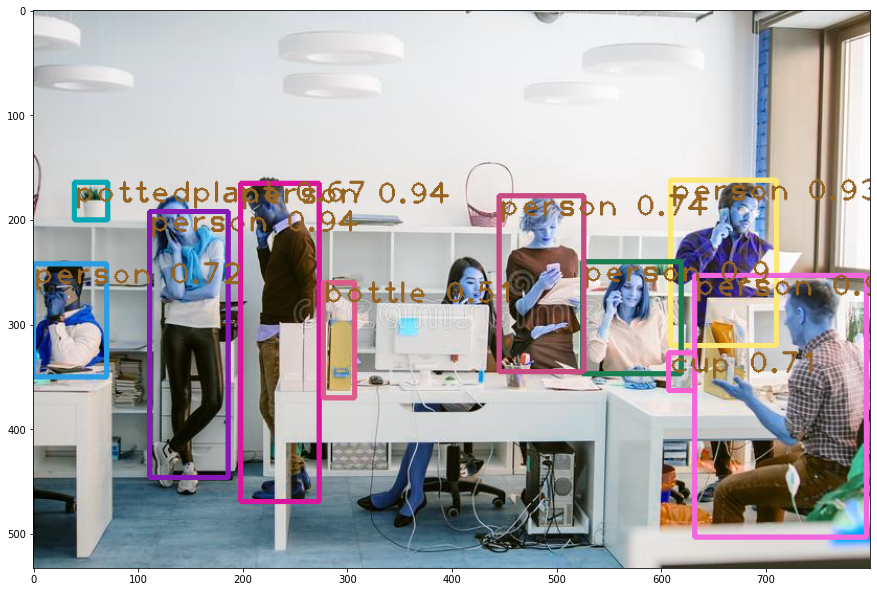

In [36]:
plt.figure(figsize=[15,14])
plt.imshow(img)